### Problem Statement: Predicting players rating  
**In this project you are going to predict the overall rating of soccer player based on their
attributes such as 'crossing', 'finishing etc.
The dataset you are going to use is from European Soccer Database
(https://www.kaggle.com/hugomathien/soccer) has more than 25,000 matches and more
than 10,000 players for European professional soccer seasons from 2008 to 2016.**

**Download the data in the same folder and run the following commmand to get it in the environment**

In [1]:
import sqlite3
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import mean_squared_error
from math import sqrt
import opendatasets as od
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#Importing data from kaggle
dataset_url = 'https://www.kaggle.com/hugomathien/soccer'
od.download(dataset_url)

  0%|                                                                                      | 0.00/32.7M [00:00<?, ?B/s]

100%|█████████████████████████████████████████████████████████████████████████████| 32.7M/32.7M [00:11<00:00, 2.98MB/s]

In [3]:
#Loading data from sqlite to 
con=sqlite3.connect('soccer/database.sqlite')
df = pd.read_sql_query("SELECT * FROM Player_Attributes", con)

**Data summary and Basic Stats**

In [4]:
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [5]:
#Getting no of rows and columns in dataframe
r,c=df.shape
print('No of rows => ',r)
print('no of columns => ',c)

No of rows =>  183978
no of columns =>  42


In [6]:
#Getting column names in dataframe
print(df.columns)

Index(['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating',
       'potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')


In [7]:
#Cheking for NULL values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  183142 non-null  object 
 9   crossing             183142 non-null  float64
 10  finishing            183142 non-null  float64
 11  heading_accuracy     183142 non-null  float64
 12  short_passing        183142 non-null  float64
 13  volleys              181265 non-null  float64
 14  dribbling            183142 non-null  float64
 15  curve            

In [8]:
#Getting a count of NULL values in each column
df.isnull().sum()

id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [9]:
print('Max no of NULL values in a column:',df.isnull().sum().max())
print('Percentage NULL values: {}%'.format(round(df.isnull().sum().max()/df.shape[0] * 100,2)))

Max no of NULL values in a column: 3230
Percentage NULL values: 1.76%


In [10]:
df=df.dropna()

In [11]:
#Seems like target/dependent feature overall_rating has 836 null values dropping these rows frst

In [12]:
#Getting different values and their counts for defensive_work_rate dataframe
df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
o           1328
1            421
2            334
ormal        317
3            243
5            231
7            207
0            188
6            179
9            143
4            116
es            94
tocky         86
ean           78
8             70
Name: defensive_work_rate, dtype: int64

In [13]:
df.loc[df['defensive_work_rate'].isin(['_0','o','1','ormal','2','3','4','5','6','7','8','9','0','es','ean','tocky'])]=np.nan

In [14]:
df.defensive_work_rate.value_counts()

medium    130846
high       27041
low        18432
Name: defensive_work_rate, dtype: int64

In [15]:
df.attacking_work_rate.value_counts()

medium    124871
high       42751
low         8539
None         158
Name: attacking_work_rate, dtype: int64

In [16]:
df['attacking_work_rate']=df['attacking_work_rate'].replace('None',np.nan)

In [17]:
df.attacking_work_rate.value_counts()

medium    124871
high       42751
low         8539
Name: attacking_work_rate, dtype: int64

In [18]:
df=df.dropna()

In [19]:
print(df.shape)
df.info()

(176161, 42)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 176161 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   176161 non-null  float64
 1   player_fifa_api_id   176161 non-null  float64
 2   player_api_id        176161 non-null  float64
 3   date                 176161 non-null  object 
 4   overall_rating       176161 non-null  float64
 5   potential            176161 non-null  float64
 6   preferred_foot       176161 non-null  object 
 7   attacking_work_rate  176161 non-null  object 
 8   defensive_work_rate  176161 non-null  object 
 9   crossing             176161 non-null  float64
 10  finishing            176161 non-null  float64
 11  heading_accuracy     176161 non-null  float64
 12  short_passing        176161 non-null  float64
 13  volleys              176161 non-null  float64
 14  dribbling            176161 non-null  float64
 15  curv

**Now no NULL values are present in the dataset.**

**Independent feature such as id,player_fifa_api_id,player_api_id,date,preferred_foot are not adding any value to data hence dropping these columns/features.**

In [20]:
df=df.drop(columns=['id','player_fifa_api_id','player_api_id','date'])

In [21]:
#Checking basic statistical features for all independent features.
df.describe()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,...,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000,176161.000000
mean,68.690857,73.519337,55.212573,50.048217,57.262805,62.542146,49.577687,59.368441,53.096542,49.423130,...,57.887660,54.941082,46.727908,50.343180,48.025204,14.721266,15.892661,20.249420,15.962211,16.276679
std,7.023502,6.578955,17.260152,19.032411,16.497744,14.183990,18.265310,17.746763,18.268367,17.823794,...,15.160678,15.555754,21.241315,21.520424,21.621540,16.865240,15.863331,20.955093,16.092080,17.217545
min,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,36.000000,52.000000,41.000000,36.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,11.000000,11.000000,11.000000
75%,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


**Conclusion: The min,max,mean values of all the features seems to be fine and within the defined range.**

In [22]:
df.head()

,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,67.0,71.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,62.0,66.0,right,medium,medium,49.0,44.0,71.0,61.0,44.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,61.0,65.0,right,medium,medium,48.0,43.0,70.0,60.0,43.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [23]:
len(df.columns)

38

In [24]:
%matplotlib inline

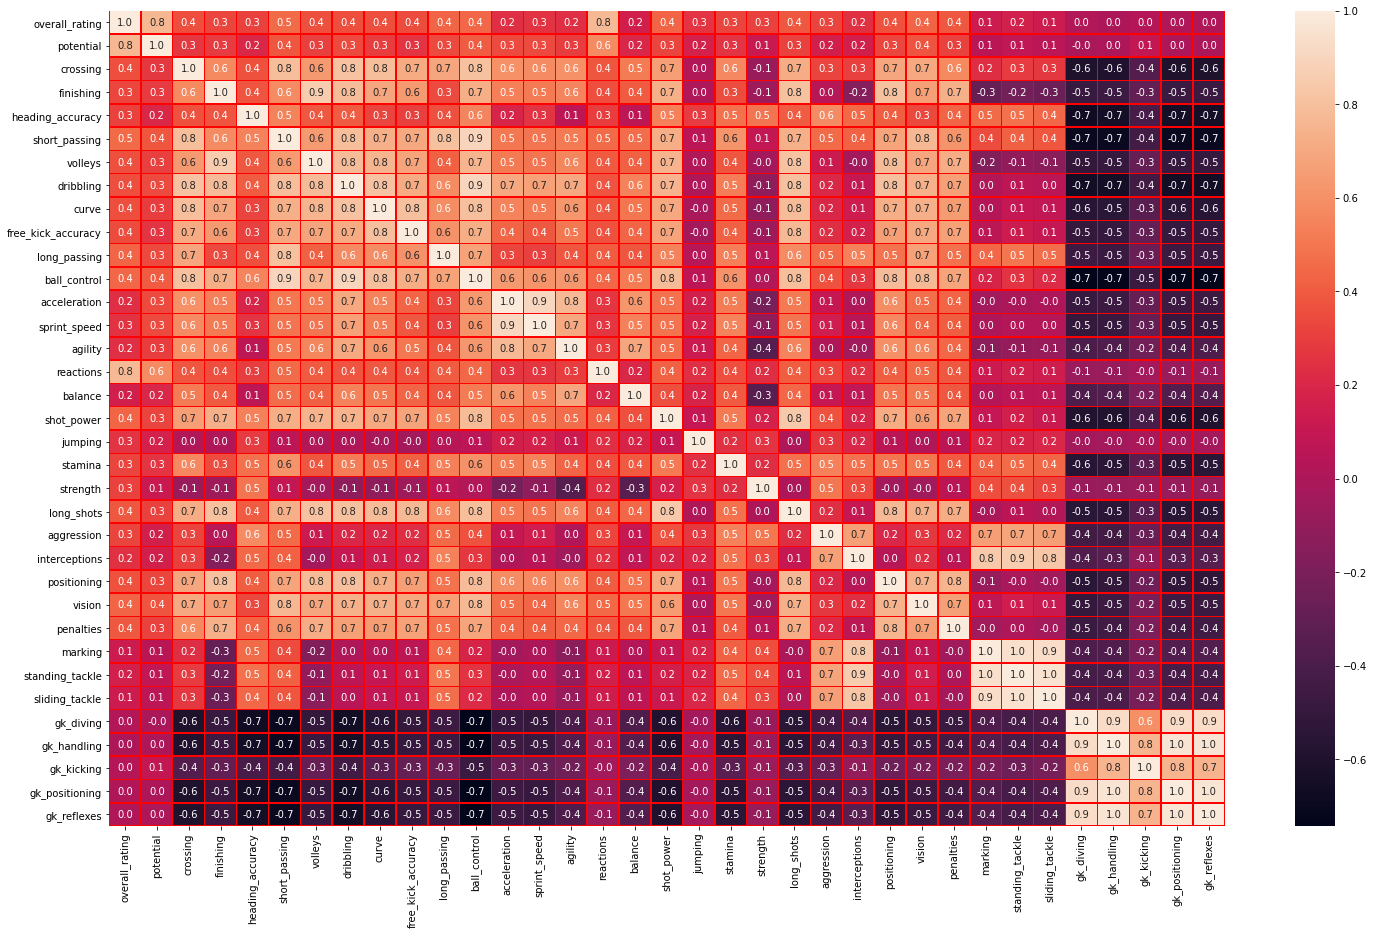

In [25]:
#Plotting a graph to check the correlation between different features
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [26]:
df.corr()

,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
overall_rating,1.000000,0.764649,0.357367,0.329919,0.314559,0.458989,0.361970,0.353778,0.357719,0.350082,...,0.431398,0.392408,0.132762,0.165308,0.129814,0.025901,0.005906,0.027893,0.007336,0.007223
potential,0.764649,1.000000,0.277497,0.288138,0.206040,0.383068,0.302105,0.340609,0.296161,0.262549,...,0.379519,0.314667,0.053894,0.082597,0.064324,-0.014134,0.004931,0.092286,0.003521,0.004167
crossing,0.357367,0.277497,1.000000,0.577221,0.369662,0.791218,0.637125,0.810560,0.789715,0.709652,...,0.695817,0.574606,0.236413,0.286798,0.276216,-0.606135,-0.597762,-0.365499,-0.599978,-0.603875
finishing,0.329919,0.288138,0.577221,1.000000,0.374881,0.581519,0.852125,0.785389,0.691900,0.634419,...,0.654286,0.728901,-0.284073,-0.228390,-0.260444,-0.481511,-0.467262,-0.298350,-0.473272,-0.475749
heading_accuracy,0.314559,0.206040,0.369662,0.374881,1.000000,0.549571,0.392376,0.401980,0.321210,0.305661,...,0.337104,0.431337,0.460788,0.480434,0.441776,-0.665912,-0.650316,-0.410810,-0.650070,-0.653417
short_passing,0.458989,0.383068,0.791218,0.581519,0.549571,1.000000,0.640506,0.790219,0.732890,0.694275,...,0.767825,0.613208,0.350610,0.416760,0.381303,-0.695386,-0.691451,-0.431317,-0.692490,-0.694698
volleys,0.361970,0.302105,0.637125,0.852125,0.392376,0.640506,1.000000,0.784067,0.752348,0.683576,...,0.692330,0.715863,-0.169499,-0.106690,-0.126780,-0.509384,-0.487552,-0.284736,-0.491780,-0.493829
dribbling,0.353778,0.340609,0.810560,0.785389,0.401980,0.790219,0.784067,1.000000,0.811219,0.709262,...,0.736604,0.665066,0.006489,0.069978,0.047247,-0.656639,-0.652923,-0.439551,-0.656071,-0.658702
curve,0.357719,0.296161,0.789715,0.691900,0.321210,0.732890,0.752348,0.811219,1.000000,0.799801,...,0.729916,0.651492,0.033793,0.095958,0.081439,-0.557926,-0.546179,-0.339511,-0.551312,-0.552798
free_kick_accuracy,0.350082,0.262549,0.709652,0.634419,0.305661,0.694275,0.683576,0.709262,0.799801,1.000000,...,0.699831,0.670293,0.072836,0.133585,0.106403,-0.498985,-0.493018,-0.287744,-0.495863,-0.497063


In [27]:
#Converting categorical data to numerical data
print(df.attacking_work_rate.value_counts())
df['attacking_work_rate']=df.attacking_work_rate.map({'low':0,'medium':1,'high':2})
print(df.attacking_work_rate.value_counts())

print(df.defensive_work_rate.value_counts())
df['defensive_work_rate']=df.defensive_work_rate.map({'low':0,'medium':1,'high':2})
print(df.defensive_work_rate.value_counts())

print(df.preferred_foot.value_counts())
df['preferred_foot']=df['preferred_foot'].map({'right':'0','left':1})
print(df.preferred_foot.value_counts())

medium    124871
high       42751
low         8539
Name: attacking_work_rate, dtype: int64
1    124871
2     42751
0      8539
Name: attacking_work_rate, dtype: int64
medium    130764
high       26972
low        18425
Name: defensive_work_rate, dtype: int64
1    130764
2     26972
0     18425
Name: defensive_work_rate, dtype: int64
right    133102
left      43059
Name: preferred_foot, dtype: int64
0    133102
1     43059
Name: preferred_foot, dtype: int64


In [28]:
X=df.drop(columns=['overall_rating'])
y=df['overall_rating']

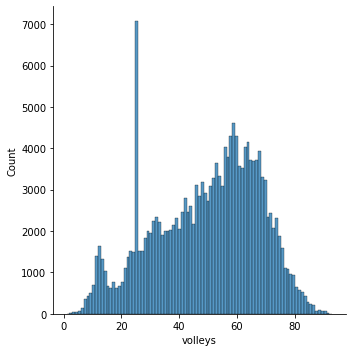

In [29]:
sns.displot(x='volleys',data=df)

In [30]:
X['preferred_foot']=X['preferred_foot'].astype(int)

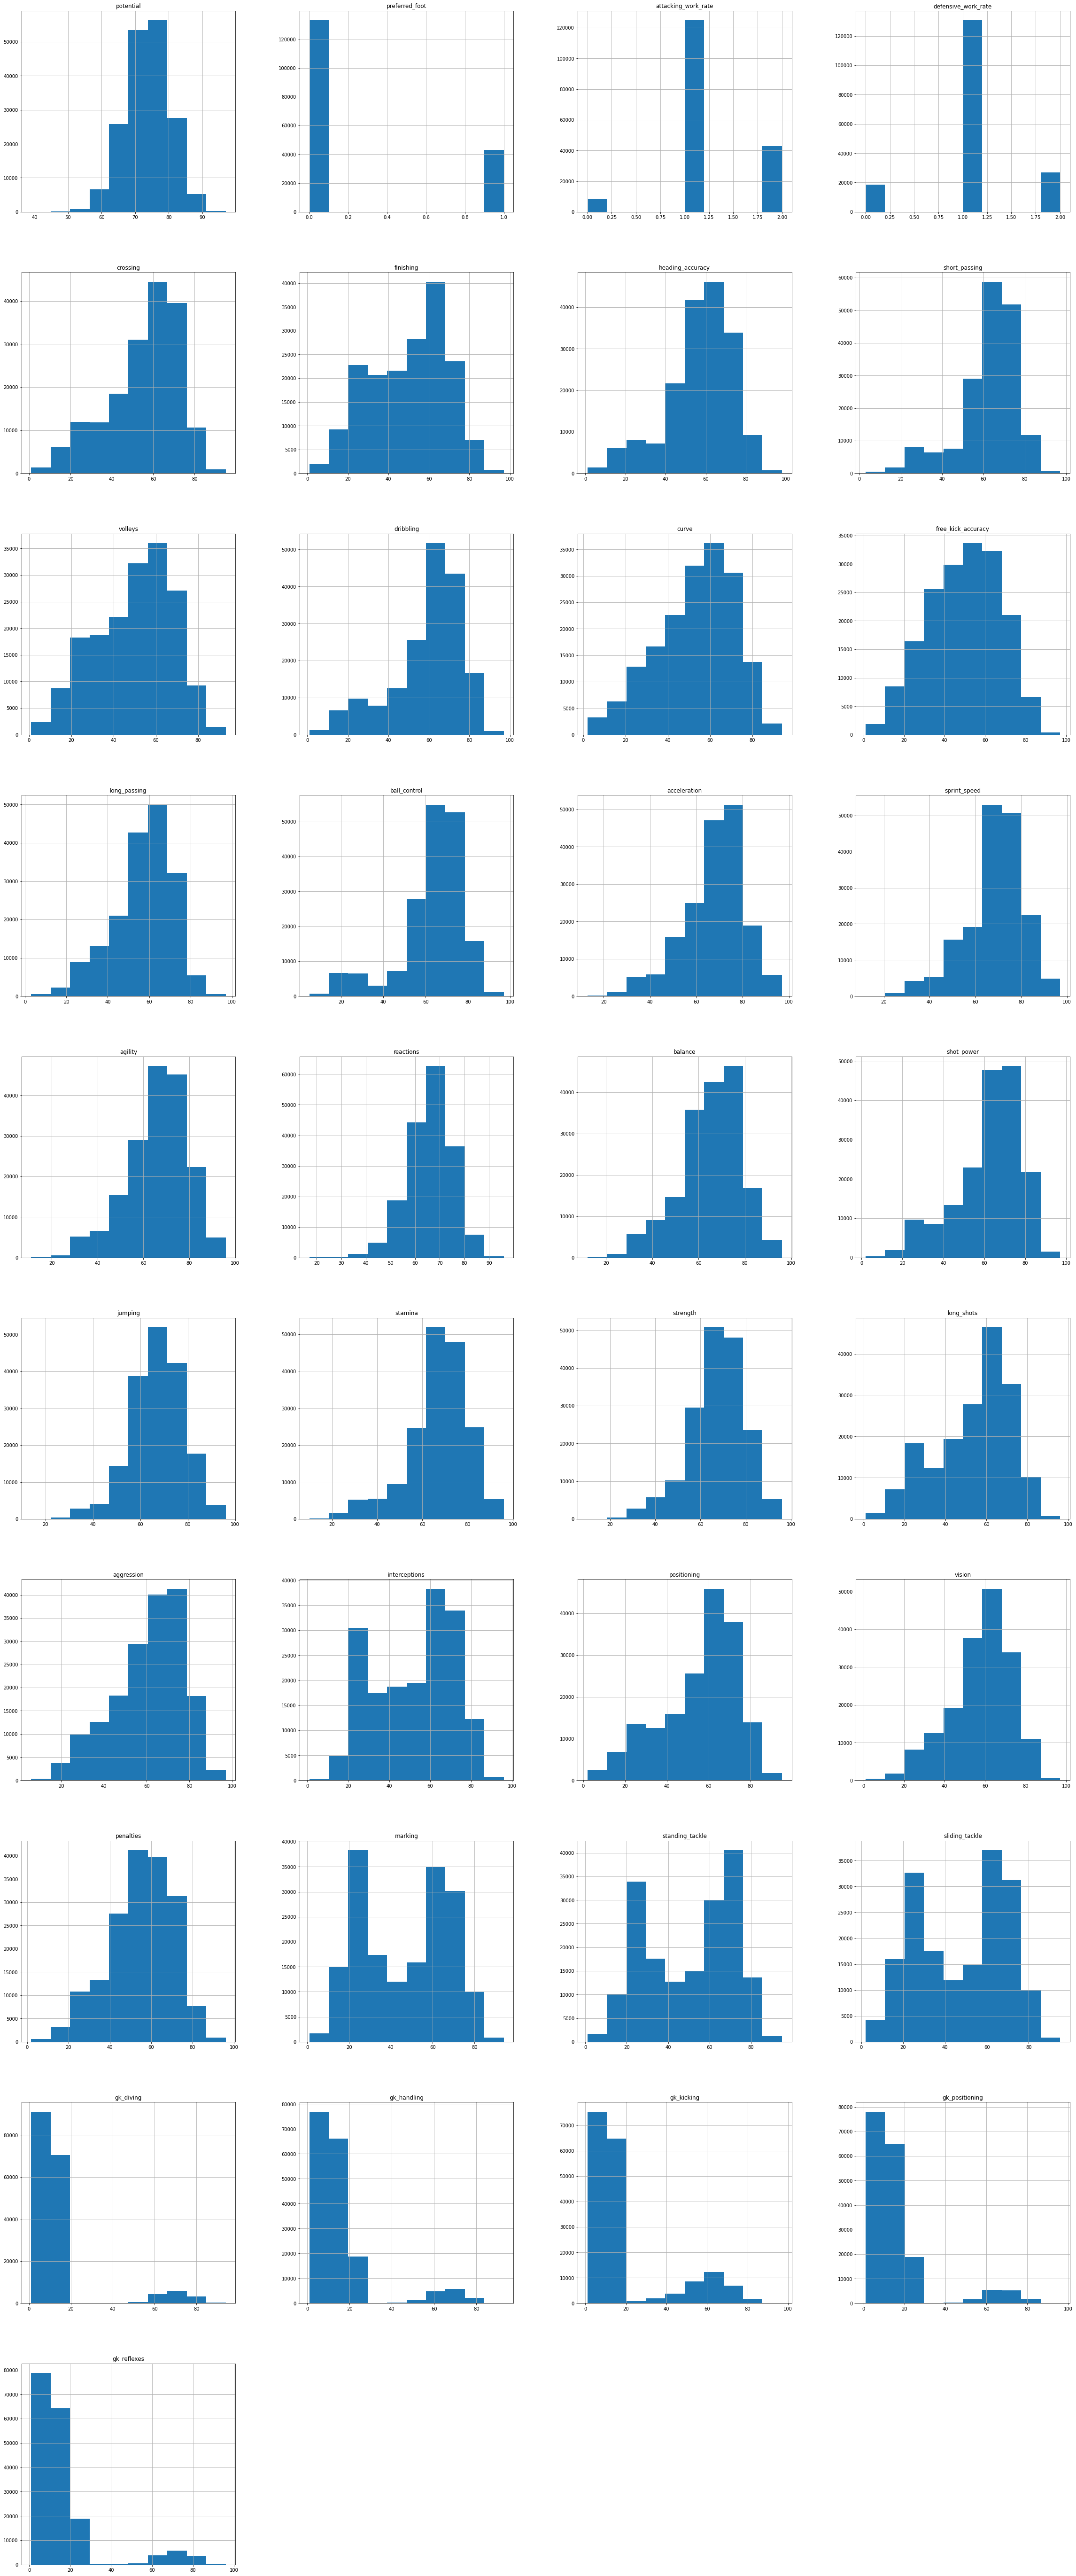

In [31]:
#Plotting each feature to get an idea of the kind of distribution.
X.hist(figsize = (40,100),layout=(-1,4))
plt.show()

**1. Left skewed and right skewed distributions observed.  
2. Multiple features follow same distributions.**

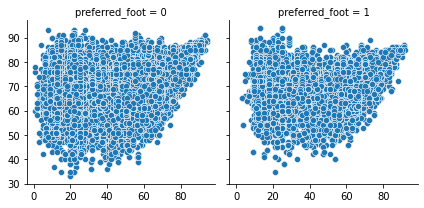

In [32]:
#Plot a graph b/w marking vs standing_tackle
g=sns.FacetGrid(df,col="preferred_foot")
g.map_dataframe(sns.scatterplot,x='marking',y='overall_rating',edgecolors='white')

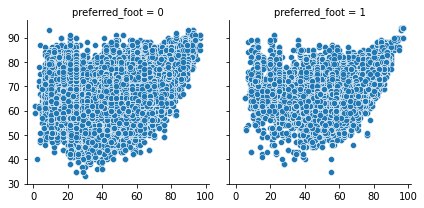

In [33]:
#Plot a graph b/w marking vs standing_tackle
g=sns.FacetGrid(df, col="preferred_foot")
g.map_dataframe(sns.scatterplot,x='dribbling',y='overall_rating',edgecolors='white')

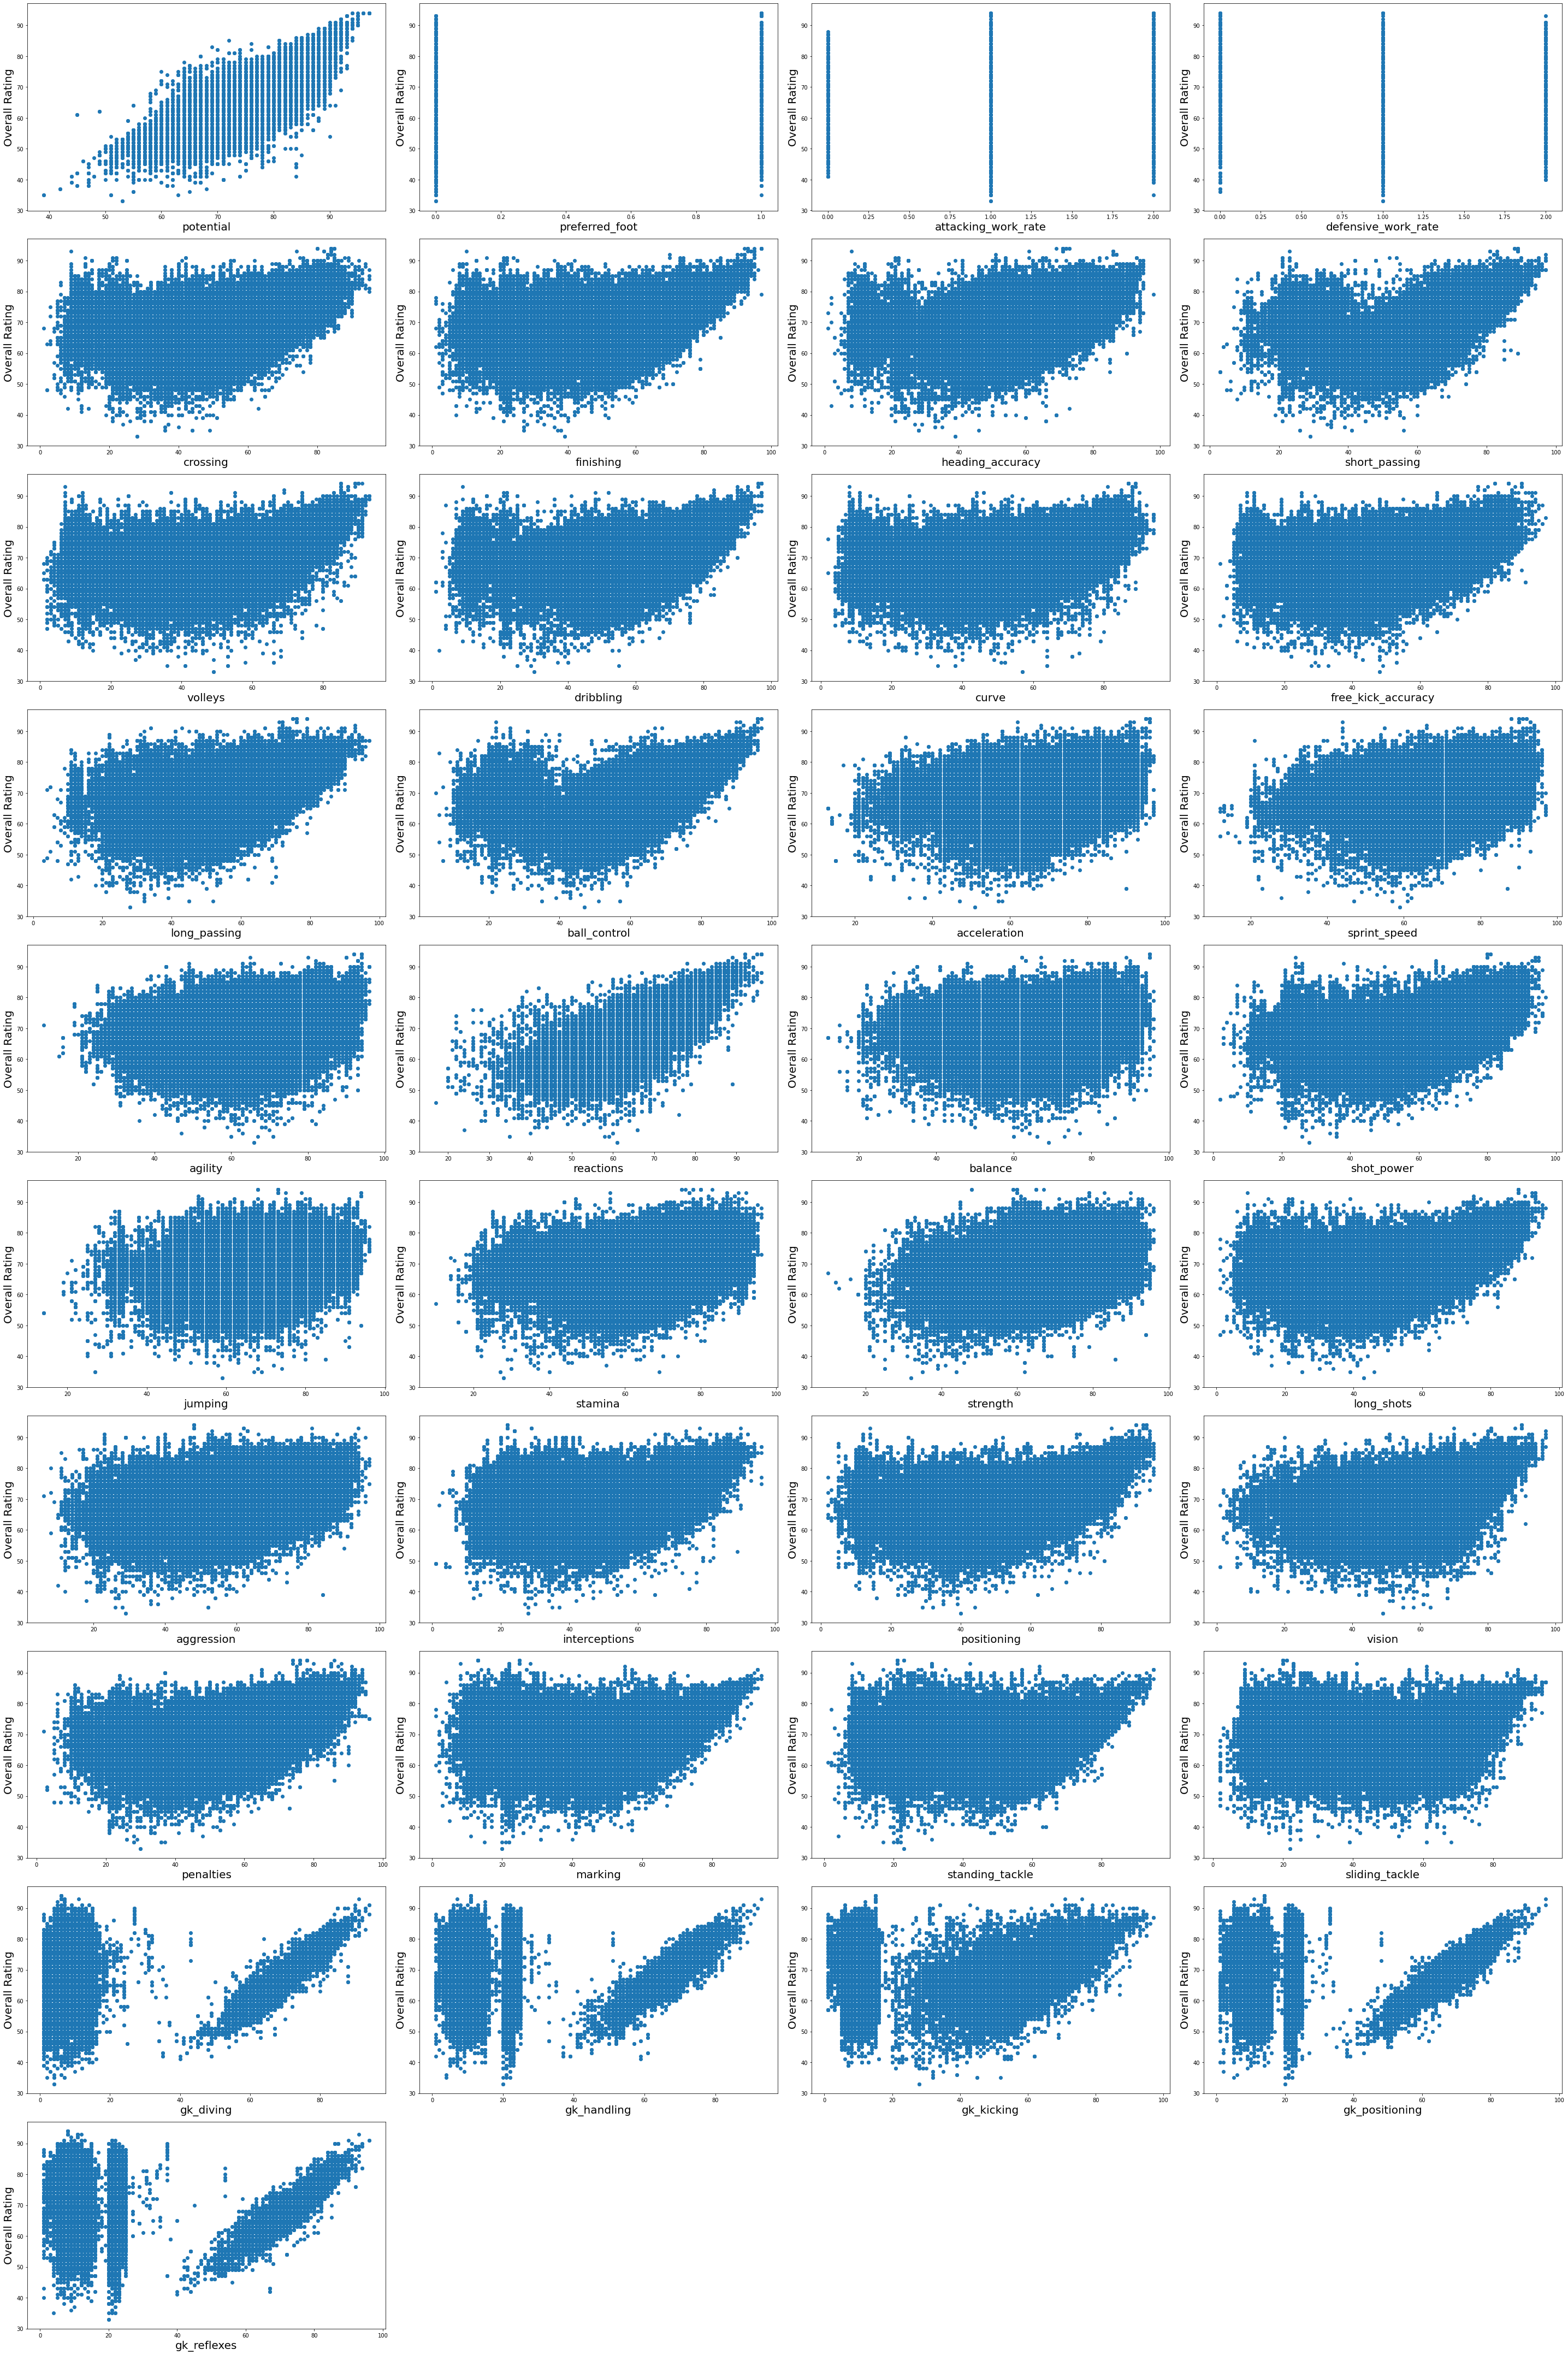

In [34]:
#Scatter plot between dependent and independent variables
plt.figure(figsize=(40,60), facecolor='white')
plotnumber = 1

for column in X:
    if plotnumber<=40:
        ax = plt.subplot(10,4,plotnumber)
        plt.scatter(X[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('Overall Rating',fontsize=20)
    plotnumber+=1
plt.tight_layout()

**Observations:  
    1. Potential and reaction features shows a linear relation wrt overall rating feature.  
    2. All Goal keeping features shows same distribution of pts wrt dependent feature.**

In [35]:
#Scaling the data and storing the same X_scaled
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X)

In [36]:
#Getting a quantitative idea of collinearity for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X.columns

In [37]:
vif.sort_values(by='VIF')

,VIF,Features
1,1.082514,preferred_foot
2,1.253294,attacking_work_rate
3,1.271513,defensive_work_rate
20,1.498038,jumping
0,2.153927,potential
17,2.303113,reactions
22,2.409209,strength
18,2.462754,balance
21,2.753059,stamina
24,2.876247,aggression


In [38]:
#Combining some of the features in order to reduce multicollinearity
X['gk_skills']=X[['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes']].mean(axis=1)

In [39]:
X['passing_skills']=X[['short_passing','long_passing','crossing']].mean(axis=1)

In [40]:
X['defending']=X[['marking','standing_tackle','sliding_tackle']].mean(axis=1)

In [41]:
X['mobility_skills']=X[['acceleration','sprint_speed','agility','reactions']].mean(axis=1)

In [42]:
X['control_skills']=X[['dribbling','ball_control','curve','heading_accuracy']].mean(axis=1)

In [43]:
X_mod=X.drop(columns=['gk_diving','gk_handling','gk_kicking','gk_positioning','gk_reflexes','short_passing','long_passing','crossing','marking','standing_tackle','sliding_tackle','acceleration','sprint_speed','agility','reactions','dribbling','ball_control','curve','heading_accuracy'])

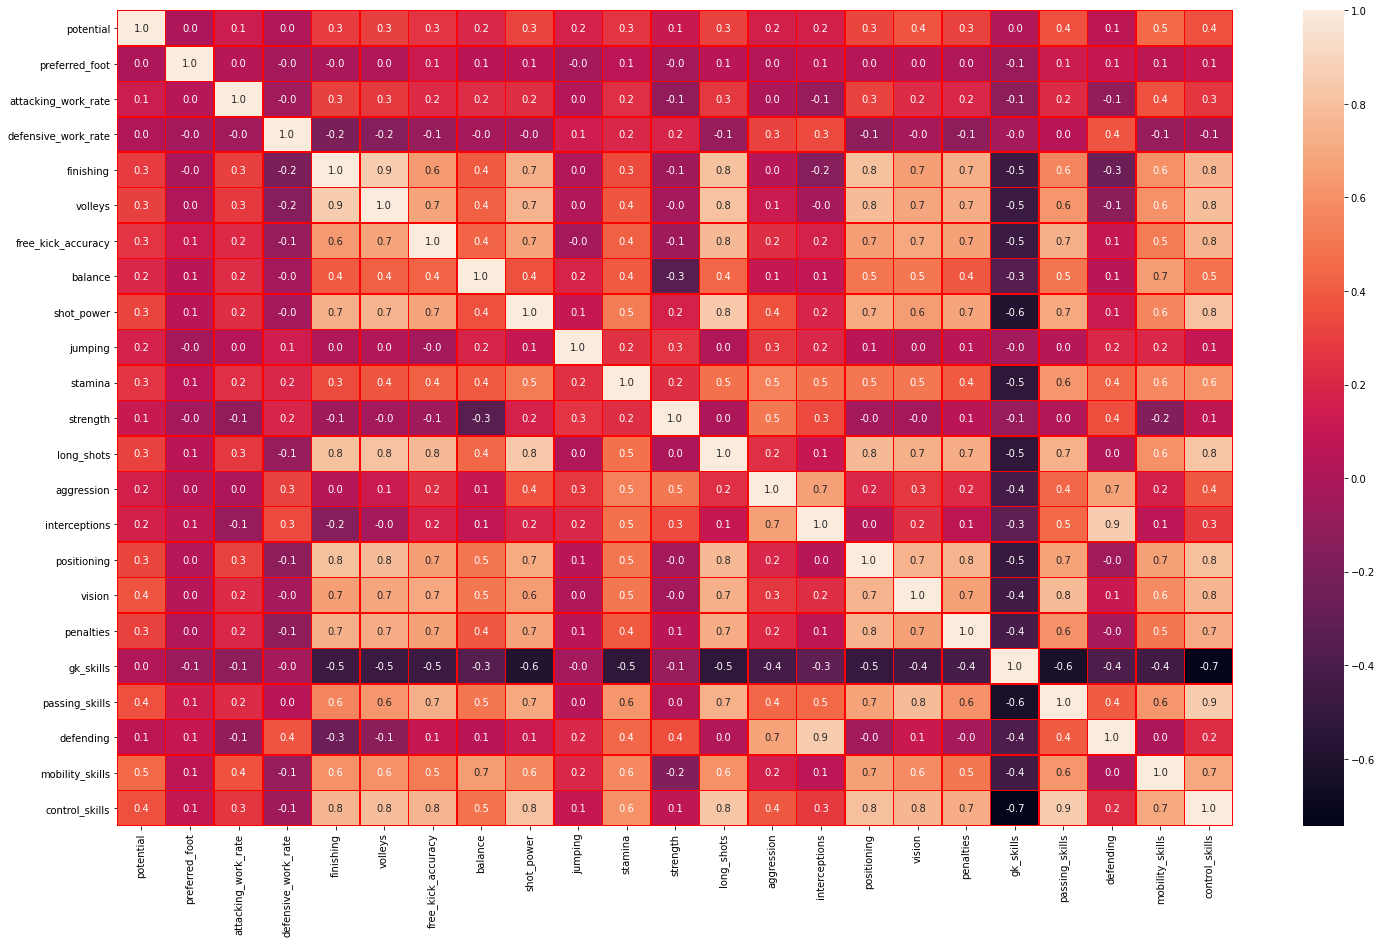

In [44]:
#Plotting a graph to check the correlation between different features
f,ax = plt.subplots(figsize=(25, 15))
sns.heatmap(X_mod.corr(), annot=True, linewidths=0.5,linecolor="red", fmt= '.1f',ax=ax)
plt.show()

In [45]:
#Scaling the data and storing the same X_scaled
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_scaled=scalar.fit_transform(X_mod)

In [46]:
#Getting a quantitative idea of collinearity for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = X_scaled
vif = pd.DataFrame()

# here we make use of the variance_inflation_factor, which will basically output the respective VIFs 
vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = X_mod.columns

vif.sort_values(by='VIF')

,VIF,Features
1,1.056974,preferred_foot
2,1.221629,attacking_work_rate
3,1.265187,defensive_work_rate
9,1.367121,jumping
0,1.801375,potential
11,2.123879,strength
7,2.291343,balance
10,2.709616,stamina
13,2.780715,aggression
17,3.049850,penalties


In [47]:
from sklearn.decomposition import PCA

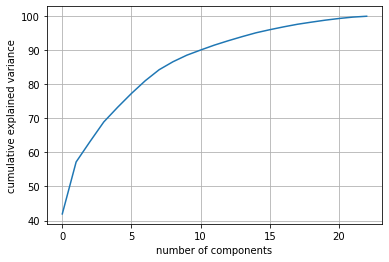

In [48]:
pca=PCA()
pca.fit(X_scaled)
#Plotting to get an idea regarding the count of components required to expained the variance
plt.grid()
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [49]:
#Applying Linear Regression on dataset
x_train,x_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.25,random_state=355)

In [50]:
print(x_train.shape)
print(x_test.shape)

(132120, 23)
(44041, 23)


In [51]:
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [52]:
print('Coeff Values: ',regression.coef_)
print('Intercept Value: ',regression.intercept_)

Coeff Values:  [ 3.38472331 -0.12448263 -0.09951786  0.02405152  0.3880906   0.0242265
  0.18304388 -0.34458949  0.47409835  0.46015275 -0.30192003  1.38360092
 -0.16515996  0.79654984 -0.17512446 -0.65315651  0.04229542  0.1933519
  3.09913848  1.65027648  0.08772874  0.79101148  1.74128621]
Intercept Value:  68.70273620679652


In [53]:
importance = regression.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 3.38472
Feature: 1, Score: -0.12448
Feature: 2, Score: -0.09952
Feature: 3, Score: 0.02405
Feature: 4, Score: 0.38809
Feature: 5, Score: 0.02423
Feature: 6, Score: 0.18304
Feature: 7, Score: -0.34459
Feature: 8, Score: 0.47410
Feature: 9, Score: 0.46015
Feature: 10, Score: -0.30192
Feature: 11, Score: 1.38360
Feature: 12, Score: -0.16516
Feature: 13, Score: 0.79655
Feature: 14, Score: -0.17512
Feature: 15, Score: -0.65316
Feature: 16, Score: 0.04230
Feature: 17, Score: 0.19335
Feature: 18, Score: 3.09914
Feature: 19, Score: 1.65028
Feature: 20, Score: 0.08773
Feature: 21, Score: 0.79101
Feature: 22, Score: 1.74129


In [54]:
from sklearn.metrics import mean_squared_error,r2_score

In [55]:
#Training model on training data and predicting on training data
y_pred=regression.predict(x_train)

In [56]:
r2 = r2_score(y_train,y_pred)
rmse = np.sqrt(mean_squared_error(y_train,y_pred))
print('R2 Score: ', r2)
print('Root Mean Sq Score: ',rmse)

R2 Score:  0.7515709816415614
Root Mean Sq Score:  3.5020586160317633


In [57]:
#Training model on training data and predicting on test data
y_pred=regression.predict(x_test)

r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 Score: ', r2)
print('Root Mean Sq Score: ',rmse)

R2 Score:  0.7510558099756153
Root Mean Sq Score:  3.5001590563369107


In [58]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'normalize': False}

In [81]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [60]:
sgdmodel=SGDRegressor(random_state=365)

In [61]:
sgdmodel.fit(x_train,y_train)

SGDRegressor(random_state=365)

In [62]:
sgdmodel.coef_

array([ 3.36669632, -0.15470381, -0.13241413,  0.09331329,  0.42925347,
        0.04072606,  0.22515781, -0.31776768,  0.47149684,  0.45138732,
       -0.25912933,  1.35214551, -0.11841514,  0.78869875, -0.14438405,
       -0.66150463,  0.06939886,  0.17539199,  3.01757489,  1.67331585,
        0.15902336,  0.79314891,  1.74933313])

In [63]:
#Training model on training data and predicting on test data
y_pred=sgdmodel.predict(x_test)

r2 = r2_score(y_test,y_pred)
rmse = np.sqrt(mean_squared_error(y_test,y_pred))
print('R2 Score: ', r2)
print('Root Mean Sq Score: ',rmse)

R2 Score:  0.749260255955822
Root Mean Sq Score:  3.512759135346547


**Hyperparameter Tuning for SGDRegressor**

In [64]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.
for x in alpha:
    sgdmodel=SGDRegressor(alpha=x,random_state=365)
    sgdmodel.fit(x_train,y_train)
    y_pred=sgdmodel.predict(x_test)

    r2 = r2_score(y_test,y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))
    print('R2 Score: ', r2,'\t Alpha Value: ',x)

R2 Score:  0.7492626346225049 	 Alpha Value:  1e-05
R2 Score:  0.749260255955822 	 Alpha Value:  0.0001
R2 Score:  0.749234643187614 	 Alpha Value:  0.001
R2 Score:  0.7506273052319004 	 Alpha Value:  0.01
R2 Score:  0.7429236113617286 	 Alpha Value:  0.1
R2 Score:  0.624976892902563 	 Alpha Value:  1
R2 Score:  0.25792384783309563 	 Alpha Value:  10


**Max Accuracy of 75 % is observed using LinearRegression and SGDRegressor**

In [65]:
from sklearn.linear_model import Ridge,RidgeCV,Lasso,LassoCV,ElasticNet,ElasticNetCV

In [66]:
# Lasso Regularization
# LassoCV will return best alpha and coefficients after performing 10 cross validations
lasscv = LassoCV(alphas = None,cv =10, max_iter = 100000, normalize = True)
lasscv.fit(x_train, y_train)

LassoCV(cv=10, max_iter=100000, normalize=True)

In [67]:
alpha=lasscv.alpha_

#Performing Lasso regression using best value of alpha.
lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train, y_train)

print(lasso_reg.score(x_test, y_test))
print(regression.score(x_test,y_test))

0.7510558216295425
0.7510558099756153


**L1 regularization score is somewhat similar to normal Linear Regression which tells us that our model does not overfit.**

In [68]:
lasso_reg.coef_

array([ 3.38476563, -0.1244646 , -0.09949726,  0.02403219,  0.38796571,
        0.02420186,  0.18301383, -0.34454768,  0.47403085,  0.46014802,
       -0.30187506,  1.38360555, -0.16496416,  0.79652238, -0.17497429,
       -0.65302423,  0.04224916,  0.19332831,  3.0990087 ,  1.65023013,
        0.0875606 ,  0.79093081,  1.74118283])

In [69]:
# Using Ridge regression model
# RidgeCV will return best alpha and coefficients after performing 10 cross validations. 
# We will pass an array of random numbers for ridgeCV to select best alpha from them

alphas = np.random.uniform(low=0, high=10, size=(50,))
ridgecv = RidgeCV(alphas = alphas,cv=10,normalize = True)
ridgecv.fit(x_train, y_train)

ridge_model = Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train, y_train)

ridge_model.score(x_test, y_test)

0.7510558055033019

In [70]:
ridge_model.coef_

array([ 3.38472473, -0.12448158, -0.09951672,  0.02405104,  0.38808582,
        0.02423251,  0.18304743, -0.34459099,  0.47409686,  0.46015451,
       -0.30192013,  1.38360023, -0.16515207,  0.79654648, -0.17511573,
       -0.65314539,  0.0423014 ,  0.19335322,  3.09911404,  1.65026839,
        0.08772545,  0.79101314,  1.74124688])

**wrt L2 regression also the values are almost same hence our model does not overfit**

In [71]:
#Lets get an accuracy score after elastic net as well
elasticCV = ElasticNetCV(alphas = None, cv =10)
elasticCV.fit(x_train, y_train)

print(elasticCV.alpha_)
# l1_ration gives how close the model is to L1 regularization, below value indicates we are giving equal
#preference to L1 and L2
print(elasticCV.l1_ratio)

elasticnet_reg = ElasticNet(alpha = elasticCV.alpha_,l1_ratio=0.5)
elasticnet_reg.fit(x_train, y_train)
elasticnet_reg.score(x_test, y_test)

0.010766472158894369
0.5


0.7508680756212169

**Conclusions from Linear Model:   
        1. The model does not overfit.  
        2. Max Accuracy which can be achieved is around 75% only, hence need to use complex models to get higher accuracy**

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [73]:
clf=DecisionTreeRegressor(random_state=365)
clf.fit(x_train,y_train)

DecisionTreeRegressor(random_state=365)

In [74]:
#Checking accuracy on training data
clf.score(x_train,y_train)

0.9994412787444802

In [75]:
print(clf.score(x_test,y_test))

0.9600313580734656


**DecisionRegressor Model seems to be overfitting as we are getting bery high accuracy, lets perform cross validation on the same to get an correct score.**

In [76]:
from sklearn.model_selection import cross_val_score

In [77]:
d_scores=cross_val_score(clf, X_scaled, y, cv=10)
print('Decision Tree CV Scores: ',d_scores)
print('Mean Score: ',d_scores.mean())
print('Std Dev observed: ',d_scores.std())

Decision Tree CV Scores:  [0.89005097 0.88628783 0.88582016 0.88487589 0.88477274 0.89461411
 0.8935394  0.88352205 0.89103283 0.88823748]
Mean Score:  0.8882753474403664
Std Dev observed:  0.003674843278883066


In [85]:
grid_param = {
    'criterion': ['mse'],
    'max_depth' : range(2,20,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']   
}

In [91]:
rand_search = RandomizedSearchCV(estimator=clf,
                     param_distributions=grid_param,
                     cv=10,
                    n_jobs =-1,verbose=10)

In [92]:
rand_search.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    4.7s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    8.6s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:   13.0s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   20.6s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:   25.6s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done  96 out of 100 | elapsed:   36.7s remaining:    1.4s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   37.5s finished


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(random_state=365),
                   n_jobs=-1,
                   param_distributions={'criterion': ['mse'],
                                        'max_depth': range(2, 20),
                                        'min_samples_leaf': range(1, 10),
                                        'min_samples_split': range(2, 10),
                                        'splitter': ['best', 'random']},
                   verbose=10)

In [93]:
rand_search.best_params_

{'splitter': 'best',
 'min_samples_split': 9,
 'min_samples_leaf': 4,
 'max_depth': 19,
 'criterion': 'mse'}

In [94]:
rand_search.best_score_

0.9551269006628864

In [95]:
#Lets build our model with best parameters
clf=DecisionTreeRegressor(random_state=365,splitter='best',min_samples_split=9,min_samples_leaf=4,max_depth=19)
clf.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=19, min_samples_leaf=4, min_samples_split=9,
                      random_state=365)

In [96]:
clf.score(x_train,y_train)

0.985331668965558

In [97]:
clf.score(x_test,y_test)

0.9552189576111986

**RandomForest Regression**

In [98]:
rand_clf=RandomForestRegressor(random_state=365)

In [99]:
rand_clf.fit(x_train,y_train)

RandomForestRegressor(random_state=365)

In [100]:
rand_clf.score(x_train,y_train)

0.996958676282187

In [101]:
rand_clf.score(x_test,y_test)

0.9800865857302492

In [102]:
#Getting cross validation score
d_scores=cross_val_score(rand_clf, X_scaled, y, cv=10)
print('Decision Tree CV Scores: ',d_scores)
print('Mean Score: ',d_scores.mean())
print('Std Dev observed: ',d_scores.std())

Decision Tree CV Scores:  [0.94940665 0.94936351 0.94914377 0.95077732 0.94832809 0.95146033
 0.95588288 0.94756284 0.95096128 0.94965701]
Mean Score:  0.9502543678579463
Std Dev observed:  0.0021900946775447
